In [1]:
from distutils.cmd import Command
from fileinput import filename
from importlib.resources import path
from multiprocessing.sharedctypes import Value
from tkinter import *
from tkinter import filedialog
from turtle import left, right
from functools import partial
from pathlib import Path
import os
import shutil

filename = str

In [2]:
# Bu fonksiyon dosya butonu için bir filedialog penceresini açar.

def Dosya():
    global filename
    filename = filedialog.askopenfilename(initialdir="\\")
    print(filename)

In [3]:
def Encrypt():
    lb['text'] = "Encrypt ediliyor..."
    key1 = input_txt1.get("1.0","end-1c")
    key = int(key1)
    file = open(filename, "rb")
    data = file.read()
    file.close()
    
    data = bytearray(data)
    for index, value in enumerate(data):
        data[index] = value ^ key   # XOR
        
    file = open(filename, "wb")
    file.write(data)
    file.close()
    lb['text'] = "Encrypt işlemi bitti..."

In [4]:
def Decrypt():
    lb['text'] = "Decrypt ediliyor..."
    BackupFolder()
    shutil.copy(filename, "C:/yedek")
    key1 = input_txt1.get("1.0","end-1c")
    key = int(key1)
    file = open(filename, "rb")
    data = file.read()
    file.close()
    
    data = bytearray(data)
    for index, value in enumerate(data):
        data[index] = value ^ key   # XOR
        
    file = open(filename, "wb")
    file.write(data)
    file.close()
    Approval()
    lb['text'] = "Decrypt işlemi bitti..."

In [5]:
def BackupFolder():
    directory = "yedek"
    parent_dir = "C:/"
    path = os.path.join(parent_dir, directory)
    try:
        os.makedirs(path, exist_ok=True)
        print("Dizin '%s' dosya oluşturuldu." % directory)
    except OSError as error:
        print("Dizin '%s' oluşturulamadı." % directory)

In [6]:
def Approval():
    win = Toplevel(window)
    win.geometry('250x100')
    Label(win,text="Dosyanın çalıştığını onaylayın.").pack()
    p2 = Button(win, text="Onayla", command=partial(DeleteBackup))
    p2.place(x=40, y=40)
    p3 = Button(win, text="Reddet", command=partial(Change))
    p3.place(x=120, y=40)
    win.mainloop()

In [7]:
# Yedek dizinini siler

def DeleteBackup():
    shutil.rmtree('C:/yedek')
    lb["text"] = "Decrypt işlemi başarılı..."

In [8]:
# Yedeği alıp herhangi bir yere tekrar kopyalar ve yedeği siler.

def Change():
    global filename
    global win
    p1 = Path(filename)
    d = p1.parents[0]
    os.remove(filename)
    fname = os.path.basename(filename)
    shutil.copy("C:/yedek/" + fname, d)
    shutil.rmtree("c:/yedek")  # yedek sil
    lb["text"] = "Dosyanız korundu."

## Arayüzü oluşturalım

In [9]:
window = Tk()
window.geometry('400x100')

button3 = Button(text='Dosya', command=(partial(Dosya)))
button3.pack(expand=True, fill=BOTH)

input_txt1 = Text(window, height=1, width=15)
input_txt1.pack(expand=True)

button1 = Button(text='Encrypt', command=(partial(Encrypt)))
button1.pack(expand=True, fill=BOTH, side=LEFT)

button2 = Button(text='Decrypt', command=(partial(Decrypt)))
button2.pack(expand=True, fill=BOTH, side=LEFT)

lb = Label()
lb.pack(expand=True)
window.mainloop()

C:/Users/sahik/Desktop/image.jpg
Dizin 'yedek' dosya oluşturuldu.


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\sahik\AppData\Local\Temp\ipykernel_5520\553472203.py", line 19, in Decrypt
    lb['text'] = "Decrypt işlemi bitti..."
  File "C:\ProgramData\anaconda3\lib\tkinter\__init__.py", line 1686, in __setitem__
    self.configure({key: value})
  File "C:\ProgramData\anaconda3\lib\tkinter\__init__.py", line 1675, in configure
    return self._configure('configure', cnf, kw)
  File "C:\ProgramData\anaconda3\lib\tkinter\__init__.py", line 1665, in _configure
    self.tk.call(_flatten((self._w, cmd)) + self._options(cnf))
_tkinter.TclError: invalid command name ".!label"


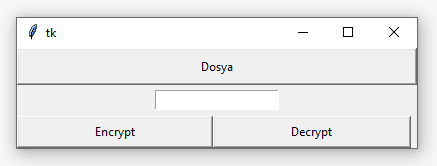

#### Encrypt
* Resimde görüldüğü gibi 8 anahtarı ile şifreliyoruz.

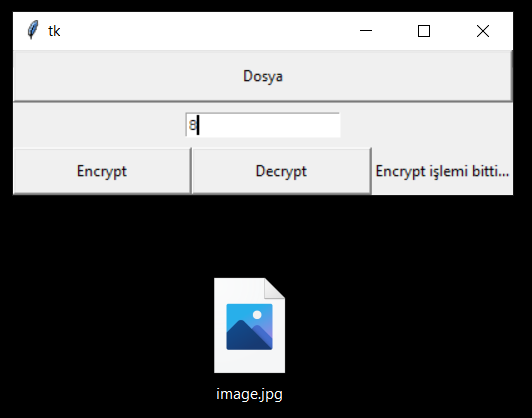

#### Decrypt
* Yine 8 anahtarını kullanarak şifresi çözülen dosyanın açılıp açılmadığını kontrol ediyoruz. Resimde görüldüğü gibi doğru anahtar ile açıldıysa onayla diyerek işlemi sonlandırıyoruz.

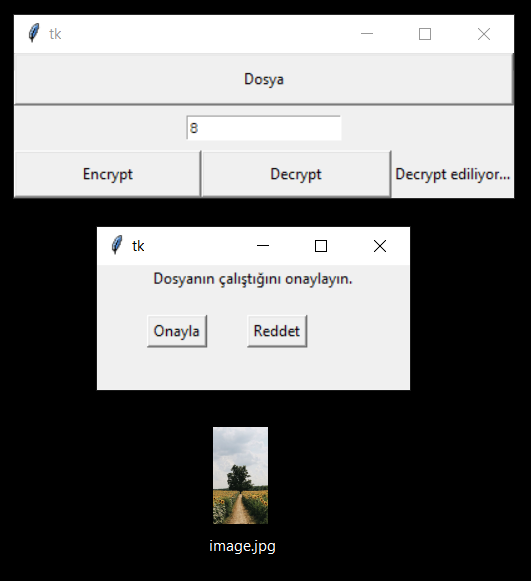

* Eğer farklı bir anahtar ile açmaya çalışılırsa resimde görüldüğü gibi şifre çözülmez.

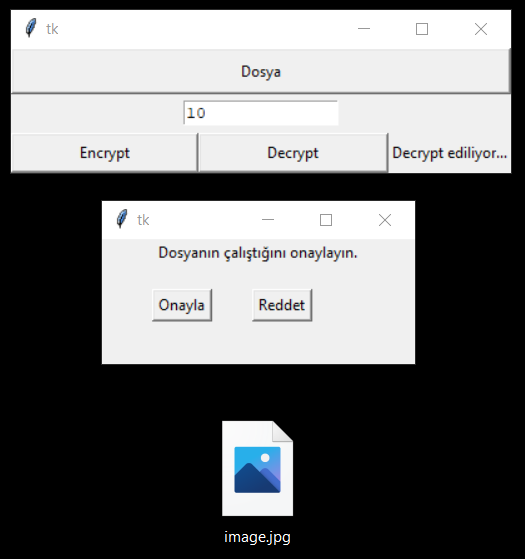

* Reddet butonuna batığımızda dosya korunur.

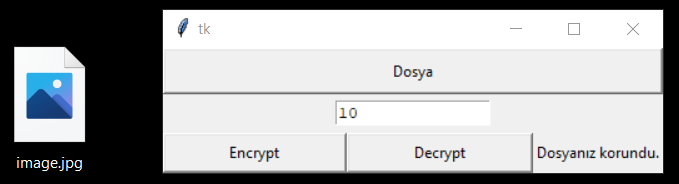

* Anahtar ile Decrypt butonuna tıkladığımızda image yedek klasöründe yedeklenir. Dosyanın çalışıp çalışmadığı onaylandığında silinir.

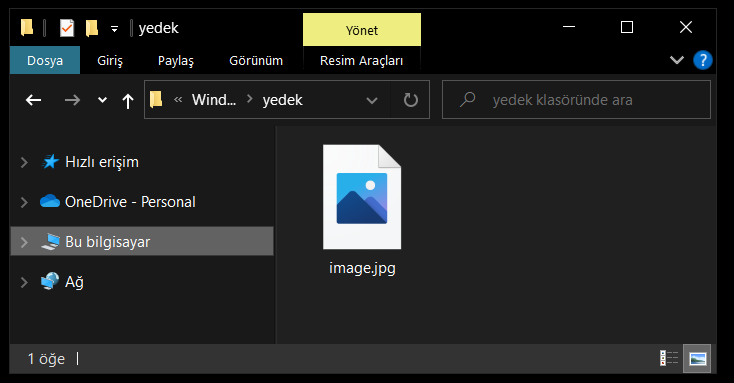